# Faktor Apakah yang Menjual Sebuah Mobil?

Anda adalah seorang analis di Crankshaft List. Ratusan iklan kendaraan gratis ditayangkan di situs web Anda setiap hari. Anda perlu mempelajari kumpulan data selama beberapa tahun terakhir dan menentukan faktor-faktor yang memengaruhi harga sebuah kendaraan.

Kami akan mempelajari kumpulan data selama beberapa tahun terakhir dan menentukan faktor-faktor yang memengaruhi harga sebuah kendaraan. Dimulai dari melakukan explorasi data, mengatasi nilai-nilai yang hilang, memeriksa dan memperbaiki tipe data yang tidak sesuai (jika ada), menghapus duplikat data (jika ada), memeriksa dan menangani outlier sampai dengan menganalisis data menggunakan histogram serta membuat kesimpulan akhir.

## Pra-pemrosesan

In [1]:
# Muat semua library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Memuat Data

In [2]:
# Muat file data menjadi DataFrame

data = pd.read_csv('vehicles_us.csv') 

### Mengeksplorasi Data Awal

*Dataset* Anda berisi kolom-kolom berikut: 


- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, disel, dan lain-lain.
- `odometer` — jarak tempuh kendaraan saat iklan ditayangkan 
- `transmission`
- `paint_color`
- `is_4wd` — apakah kendaraan memiliki penggerak 4 roda (tipe Boolean)
- `date_posted` — tanggal iklan ditayangkan
- `days_listed` — jumlah hari iklan ditayangkan hingga dihapus

In [3]:
# tampilkan informasi/rangkuman umum tentang DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# tampilkan informasi/rangkuman umum tentang DataFrame

data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [5]:
# tampilkan sampel data
data.sample(frac=0.1)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
35840,4800,2007.0,volkswagen jetta,excellent,5.0,gas,172800.0,automatic,sedan,silver,NaN,2018-07-05,9
26789,26999,2018.0,chevrolet silverado,like new,8.0,gas,7701.0,automatic,pickup,grey,1.0,2018-10-06,37
28840,13990,2015.0,honda accord,like new,4.0,gas,26400.0,automatic,sedan,silver,NaN,2018-12-02,34
17353,4995,2014.0,volkswagen jetta,good,4.0,gas,NaN,automatic,sedan,red,NaN,2018-05-05,44
47431,8200,2002.0,ford f350 super duty,good,8.0,diesel,200000.0,automatic,pickup,NaN,1.0,2018-12-15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15349,13995,1998.0,chevrolet corvette,good,8.0,gas,53462.0,automatic,coupe,silver,NaN,2018-11-07,52
5666,20995,2014.0,chevrolet silverado 1500,excellent,8.0,gas,183255.0,automatic,pickup,white,1.0,2019-01-07,11
7512,12995,NaN,ford mustang,good,6.0,gas,NaN,automatic,convertible,NaN,NaN,2018-10-08,57
23443,10500,2011.0,bmw x5,excellent,6.0,diesel,122.0,automatic,SUV,NaN,1.0,2018-07-25,27


Dari informasi umum kita mengetahui bahwa:
1. Mobil tertua yang diposting di web adalah tahun 1908 dan yang termuda adalah 2019.
2. Terdapat missing value pada 5 kolom (model_year, cylinders, odometer, paint_color, & is_4wd) dengan persentase mulai dari 7% sampai dengan 50% terhadap keseluruhan data.
3. Kolom date_posted tidak sesuai dengan yang seharusnya, karena menunjukkan waktu.
4. Nilai mean, median, dan max pada kolom price terlalu jauh (variance 30%), mengindikasikan adanya data outlier, begitu pula dengan kolom days_listed.
5. Kolom is_4wd merupakan nilai Boolean, kita perlu mengisi kolom yang hilang menjadi False, karena kita berasumsi bahwa yang tidak terisi merupakan kendaraan yang tidak memiliki penggerak 4 roda.

In [6]:
# Distribusi masing-masing missing value terhadap keseluruhan data

data.isna().sum() / len(data) * 100

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

Terdapat kolom dengan tipe data yang tidak sesuai, yaitu date_posted yang seharusnya bertipe datetime.

In [7]:
# melihat distribusi dan tipe data pada kolom date_posted

data['date_posted'].describe()

count          51525
unique           354
top       2019-03-17
freq             186
Name: date_posted, dtype: object

Terdapat nilai hilang pada 5 kolom, dimana kolom is_4wd yang paling banyak nilai hilangnya (50% dari keseluruhan data). Karena kolom is_4wd adalah tipe Boolean maka asumsinya nilai yang hilang adalah untuk nilai False.

In [8]:
# Persentase nilai hilang terhadap keseluruhan data

data.isna().sum() / len(data) * 100

price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

### Kesimpulan dan Langkah-Langkah Selanjutnya


Sejauh ini data masih terlihat normal meskipun kita memiliki data mean, median, dan max yang variannya berjauhan, sehingga kita bisa mengira bahwa terdapat banyak outlier. Namun, mengingat ini adalah situs web yang dapat diakses umum oleh siapapun, sehingga dirasa hal ini wajar.
Langkah-langkah selanjutnya untuk menangani data yang bermasalah, diantaranya:
1. Kolom is_4wd bertipe Boolean sehingga untuk nilai yang hilang akan diganti dengan False (asumsi kita, nilai yang hilang adalah kendaraan tanpa penggerak 4 roda.
2. Mengecek nilai yang hilang pada ke-empat kolom lainnya auntuk menentukan akan diganti dengan nilai apa (tergantung hasil pengecekan).  
2. Kolom days_posted akan diganti menjadi tipe datetime.
3. Condition akan ditambahkan kolom skala numerik untuk memudahkan analisis.

In [9]:
# Melihat informasi umum pada dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


## Mengatasi Nilai-Nilai yang Hilang (Jika Ada)

In [10]:
# membuat tabel yang memiliki kolom-kolom dengan nilai-nilai yang hilang untuk disimpan disana
# sehingga kita tetap memiliki dat tersebut, karena kita ingin mengganti nilai hilang pada data asli

data_null = data.loc[(data['model_year'].isna()) | (data['cylinders'].isna()) |
                     (data['odometer'].isna()) | (data['paint_color'].isna()) |
                     (data['is_4wd'].isna())]
data_null

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


In [11]:
# melihat bagaimana nilai yang hilang di kolom model_year
data[data['model_year'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,1.0,2018-11-28,24
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,1.0,2019-04-18,13
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,1.0,2018-09-18,56
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37


In [12]:
# melihat informasi umum pada kolom model_year

data['model_year'].describe()

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

In [13]:
# mengganti nilai yang hilang di kolom model_year dengan nilai median
# karena ini adalah data umum dimana kendaraan tahun berapapun bisa di posting disini
# untuk itu sebaiknya menggunakan nilai tengah

data.loc[data['model_year'].isna(), 'model_year'] = data['model_year'].median()

In [14]:
# memeriksa kolom model_year apakah masih ada nilai yang hilang
data['model_year'].isna().sum()

0

In [15]:
# melihat informasi umum pada kolom cylinders

data['cylinders'].describe()

count    46265.000000
mean         6.125235
std          1.660360
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

In [16]:
# mengganti nilai yang hilang di kolom cylinders dengan nilai median dengan alasan yang sama dengan model_year

data.loc[data['cylinders'].isna(), 'cylinders'] = data['cylinders'].median()

In [17]:
# memeriksa kembali kolom cylinders apakah masih ada nilai yang hilang
data['cylinders'].isna().sum()

0

In [18]:
# melihat informasi umum pada kolom odometer

data['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

In [19]:
# mengganti nilai yang hilang di kolom odometer dengan nilai median dengan alasan yang sama dengan model_year

data.loc[data['odometer'].isna(), 'odometer'] = data['odometer'].median()

In [20]:
# memeriksa kolom odometer apakah masih ada nilai yang hilang
data['odometer'].isna().sum()

0

In [21]:
# melihat distribusi pada kolom paint_color

data['paint_color'].value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

In [22]:
# memeriksa nilai unik pada kolom paint_color
data['paint_color'].unique()

array([nan, 'white', 'red', 'black', 'blue', 'grey', 'silver', 'custom',
       'orange', 'yellow', 'brown', 'green', 'purple'], dtype=object)

In [23]:
# menghitung nilai hilang pada kolom paint_color

data['paint_color'].isna().sum()

9267

In [24]:
# mengganti nilai yang hilang di kolom paint_color dengan nilai others
# kita berasumsi bahwa ada human error pada user yang memasang iklan di web (lupa / terlewat mengisi informasi warna)

data['paint_color'] = data['paint_color'].fillna('others')

In [25]:
# memeriksa kembali kolom paint_color apakah masih ada nilai yang hilang
data['paint_color'].isna().sum()

0

In [26]:
# melihat kembali distribusi pada kolom paint_color

data['paint_color'].value_counts()

white     10029
others     9267
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

In [27]:
# memeriksa kembali nilai unik pada kolom paint_color
data['paint_color'].unique()

array(['others', 'white', 'red', 'black', 'blue', 'grey', 'silver',
       'custom', 'orange', 'yellow', 'brown', 'green', 'purple'],
      dtype=object)

In [28]:
# memeriksa nilai yang hilang pada kolom is_4wd

data['is_4wd'].isna().sum()

25953

In [29]:
# mengganti nilai yang hilang pada kolom is_4wd

data['is_4wd'] = data['is_4wd'].fillna(0)

In [30]:
# memeriksa kembali kolom cylinders apakah masih ada nilai yang hilang

data['is_4wd'].isna().sum()

0

In [31]:
# memeriksa kolom is_4wd setelah diganti nilai hilangnya

data['is_4wd'].value_counts()

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

In [32]:
# memeriksa kembali data kita apakah sudah lengkap semua / tidak ada lagi nilai hilang

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [33]:
# memeriksa apakah ada data duplikat

data.duplicated().sum()

0

## Memperbaiki Tipe Data

Karena data kita sekarang kurang lebih telah lengkap, maka selanjutnya kita akan memperbaiki tipe dataa untuk kolom yang tidak sesuai.

In [34]:
# mengubah tipe data kolom cylinders
data['cylinders'] = data['cylinders'].astype(int)

In [35]:
# memperbaiki tipe data di kolom date_posted menjadi karena kolom itu menunjukkan waktu

data['date_posted'] = pd.to_datetime(data['date_posted'], format='%Y-%m-%d')


In [36]:
# mengubah tipe kolom days_listed ke datetime untuk digunakan untuk membuat kolom tanggal terakhir iklan ditayangkan

data['days_listed'] = pd.to_timedelta(data['days_listed'], unit='D')

In [37]:
# memeriksa kolom-kolom yang telah diperbaiki

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype          
---  ------        --------------  -----          
 0   price         51525 non-null  int64          
 1   model_year    51525 non-null  float64        
 2   model         51525 non-null  object         
 3   condition     51525 non-null  object         
 4   cylinders     51525 non-null  int64          
 5   fuel          51525 non-null  object         
 6   odometer      51525 non-null  float64        
 7   transmission  51525 non-null  object         
 8   type          51525 non-null  object         
 9   paint_color   51525 non-null  object         
 10  is_4wd        51525 non-null  float64        
 11  date_posted   51525 non-null  datetime64[ns] 
 12  days_listed   51525 non-null  timedelta64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(6), timedelta64[ns](1)
memory usage: 5.1+ MB


In [38]:
# melihat kolom-kolom yang telah diperbaiki

data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6,gas,145000.0,automatic,SUV,others,1.0,2018-06-23,19 days
1,25500,2011.0,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50 days
2,5500,2013.0,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79 days
3,1500,2003.0,ford f-150,fair,8,gas,113000.0,automatic,pickup,others,0.0,2019-03-22,9 days
4,14900,2017.0,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28 days
5,14990,2014.0,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15 days
6,12990,2015.0,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73 days
7,15990,2013.0,honda pilot,excellent,6,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68 days
8,11500,2012.0,kia sorento,excellent,4,gas,104174.0,automatic,SUV,others,1.0,2018-07-16,19 days
9,9200,2008.0,honda pilot,excellent,6,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17 days


## Memperbaiki Kualitas Data

In [39]:
# Tambahkan nilai waktu dan tanggal pada saat iklan ditayangkan: hari, bulan, dan tahun
# Days legend: 0=senin, 1=selasa, 2=rabu, 3=kamis, 4=jumat, 5=sabtu, 6=minggu

data['days_posted'] = data['date_posted'].dt.dayofweek
data['months_posted'] = data['date_posted'].dt.month
data['years_posted'] = data['date_posted'].dt.year


In [40]:
# Menambahkan kolom tanggal terakhir iklan ditayangkan

data['last_posted'] = data['date_posted'] + data['days_listed']


In [41]:
# memeriksa kolom baru yang telah dibuat

data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,days_posted,months_posted,years_posted,last_posted
0,9400,2011.0,bmw x5,good,6,gas,145000.0,automatic,SUV,others,1.0,2018-06-23,19 days,5,6,2018,2018-07-12
1,25500,2011.0,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50 days,4,10,2018,2018-12-08
2,5500,2013.0,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79 days,3,2,2019,2019-04-27
3,1500,2003.0,ford f-150,fair,8,gas,113000.0,automatic,pickup,others,0.0,2019-03-22,9 days,4,3,2019,2019-03-31
4,14900,2017.0,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28 days,1,4,2019,2019-04-30


In [42]:
# Tambahkan usia kendaraan saat iklan ditayangkan

data['car_age'] = data['years_posted'] - data['model_year']

In [43]:
# Memeriksa nilai unik car_age

sorted(data['car_age'].unique())

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 63.0,
 65.0,
 69.0,
 71.0,
 82.0,
 89.0,
 110.0]

In [44]:
# Menyimpan ke tabel baru sementara untuk data yang car_age nya bernilai 0

temp = data[(data['car_age'] == 0)]
temp

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,days_posted,months_posted,years_posted,last_posted,car_age
19,13990,2018.0,hyundai elantra,excellent,4,gas,31932.0,automatic,sedan,red,0.0,2018-08-25,27 days,5,8,2018,2018-09-21,0.0
71,23300,2018.0,nissan frontier crew cab sv,good,6,gas,27493.0,other,pickup,others,1.0,2018-10-13,36 days,5,10,2018,2018-11-18,0.0
78,23800,2019.0,nissan frontier crew cab sv,good,6,gas,10899.0,other,pickup,silver,1.0,2019-02-28,30 days,3,2,2019,2019-03-30,0.0
99,39950,2018.0,chevrolet silverado,excellent,8,gas,18500.0,automatic,truck,others,1.0,2018-08-05,16 days,6,8,2018,2018-08-21,0.0
106,21500,2019.0,nissan frontier crew cab sv,good,6,gas,16168.0,other,pickup,white,0.0,2019-03-29,70 days,4,3,2019,2019-06-07,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51376,27890,2018.0,ram 1500,excellent,8,gas,9446.0,automatic,truck,others,1.0,2018-05-06,39 days,6,5,2018,2018-06-14,0.0
51442,28990,2018.0,ford f150,excellent,6,gas,10152.0,automatic,truck,white,1.0,2018-06-13,47 days,2,6,2018,2018-07-30,0.0
51446,15999,2018.0,chevrolet malibu,excellent,4,gas,50502.0,automatic,sedan,black,0.0,2018-07-28,8 days,5,7,2018,2018-08-05,0.0
51447,33990,2019.0,ram 1500,excellent,8,gas,9000.0,automatic,truck,white,1.0,2019-01-25,36 days,4,1,2019,2019-03-02,0.0


In [45]:
# Melihat distribusi car_age = 0 terhadap kolom condition di tabel sementara

temp['condition'].value_counts()

excellent    995
like new     536
good         517
new           74
salvage        4
fair           2
Name: condition, dtype: int64

In [46]:
# Pada cell sebelumnya, terlihat bahwa car_age = 0 terjadi di semua kondisi kendaraan
# Untuk memudahkan analisis, kpada data asli kami akan mengatasinya dengan cara:
# Mengganti 0 menjadi 1 jika kolom condition tidak sama dengan new --> asumsinya memang menjual mobil baru yang belum pernah dipakai

data.loc[(data['car_age'] == 0) & (data['condition'] != 'new'), 'car_age'] = 1


In [47]:
# Memeriksa kembali distribusi car_age yang bernilai 0 dengan menyimpannya ke tabel sementara
# Pada hasil dibawah terlihat ada 74 rows, sehingga sudah cocok dengan data condition new pada 2 cells sebelum ini

temp2 = data[(data['car_age'] == 0)]
temp2

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,days_posted,months_posted,years_posted,last_posted,car_age
663,30000,2018.0,toyota highlander,new,6,gas,6893.0,automatic,SUV,white,0.0,2018-07-14,24 days,5,7,2018,2018-08-07,0.0
833,44505,2019.0,dodge charger,new,8,gas,202.0,automatic,sedan,black,0.0,2019-02-06,44 days,2,2,2019,2019-03-22,0.0
901,23000,2018.0,honda civic,new,4,gas,13800.0,automatic,hatchback,others,0.0,2018-08-18,25 days,5,8,2018,2018-09-12,0.0
3342,26000,2018.0,chevrolet colorado,new,6,gas,2800.0,automatic,pickup,grey,1.0,2018-10-30,51 days,1,10,2018,2018-12-20,0.0
4062,37490,2018.0,gmc sierra 2500hd,new,8,gas,23.0,automatic,pickup,black,1.0,2018-10-14,20 days,6,10,2018,2018-11-03,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44304,20000,2018.0,ford fusion,new,4,gas,20000.0,automatic,sedan,silver,0.0,2018-09-06,2 days,3,9,2018,2018-09-08,0.0
48229,19950,2018.0,ram 1500,new,6,gas,82.0,automatic,truck,white,0.0,2018-09-27,36 days,3,9,2018,2018-11-02,0.0
50077,19000,2018.0,honda civic,new,4,gas,12632.0,automatic,sedan,others,0.0,2018-10-04,15 days,3,10,2018,2018-10-19,0.0
50113,66000,2018.0,ford f-250,new,8,diesel,22000.0,automatic,truck,white,1.0,2018-07-19,4 days,3,7,2018,2018-07-23,0.0


In [48]:
# Memeriksa kembali data asli

data.head(20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,days_posted,months_posted,years_posted,last_posted,car_age
0,9400,2011.0,bmw x5,good,6,gas,145000.0,automatic,SUV,others,1.0,2018-06-23,19 days,5,6,2018,2018-07-12,7.0
1,25500,2011.0,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50 days,4,10,2018,2018-12-08,7.0
2,5500,2013.0,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79 days,3,2,2019,2019-04-27,6.0
3,1500,2003.0,ford f-150,fair,8,gas,113000.0,automatic,pickup,others,0.0,2019-03-22,9 days,4,3,2019,2019-03-31,16.0
4,14900,2017.0,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28 days,1,4,2019,2019-04-30,2.0
5,14990,2014.0,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15 days,2,6,2018,2018-07-05,4.0
6,12990,2015.0,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73 days,3,12,2018,2019-03-10,3.0
7,15990,2013.0,honda pilot,excellent,6,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68 days,0,1,2019,2019-03-16,6.0
8,11500,2012.0,kia sorento,excellent,4,gas,104174.0,automatic,SUV,others,1.0,2018-07-16,19 days,0,7,2018,2018-08-04,6.0
9,9200,2008.0,honda pilot,excellent,6,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17 days,4,2,2019,2019-03-04,11.0


In [49]:
# Tambahkan jarak tempuh rata-rata kendaraan per tahun
# Mengatasi kolom car_age = 0 dengan mengisi kolom avg_milleage = 0
# Karena kita asumsikan kendaraan baru belum pernah dipakai (odometer nya masih nol)

data['avg_mileage'] = data['odometer'] / data['car_age']
data.loc[data['car_age'] == 0, 'avg_mileage'] = 0


In [50]:
# Melihat informasi umum pada kolom jarak avg_mileage
# Min = 0 berasal dari mobil baru yang diposting

data['avg_mileage'].describe()

count     51525.000000
mean      19104.626006
std       16826.205674
min           0.000000
25%       10352.941176
50%       15151.400000
75%       22201.800000
max      373200.000000
Name: avg_mileage, dtype: float64

In [51]:
# Memeriksa kolom baru

data.head(20)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,days_posted,months_posted,years_posted,last_posted,car_age,avg_mileage
0,9400,2011.0,bmw x5,good,6,gas,145000.0,automatic,SUV,others,1.0,2018-06-23,19 days,5,6,2018,2018-07-12,7.0,20714.285714
1,25500,2011.0,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50 days,4,10,2018,2018-12-08,7.0,12672.142857
2,5500,2013.0,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79 days,3,2,2019,2019-04-27,6.0,18333.333333
3,1500,2003.0,ford f-150,fair,8,gas,113000.0,automatic,pickup,others,0.0,2019-03-22,9 days,4,3,2019,2019-03-31,16.0,7062.500000
4,14900,2017.0,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28 days,1,4,2019,2019-04-30,2.0,40451.500000
5,14990,2014.0,chrysler 300,excellent,6,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15 days,2,6,2018,2018-07-05,4.0,14488.500000
6,12990,2015.0,toyota camry,excellent,4,gas,79212.0,automatic,sedan,white,0.0,2018-12-27,73 days,3,12,2018,2019-03-10,3.0,26404.000000
7,15990,2013.0,honda pilot,excellent,6,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68 days,0,1,2019,2019-03-16,6.0,18245.500000
8,11500,2012.0,kia sorento,excellent,4,gas,104174.0,automatic,SUV,others,1.0,2018-07-16,19 days,0,7,2018,2018-08-04,6.0,17362.333333
9,9200,2008.0,honda pilot,excellent,6,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17 days,4,2,2019,2019-03-04,11.0,13381.000000


In [52]:
# Mungkin membantu untuk mengganti nilai pada kolom 'condition' dengan sesuatu yang dapat dimanipulasi dengan lebih mudah
# Memeriksa nilai unik pada kolom condition

data['condition'].unique()


array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [53]:
# membuat fungi untuk skala condition

condition_category = data['condition']

def condition_scale (condition_category):
    if condition_category == 'new':
        return 5
    if condition_category == 'like new':
        return 4
    if condition_category == 'excellent':
        return 3
    if condition_category == 'good':
        return 2
    if condition_category == 'fair':
        return 1
    else:
        return 0


In [54]:
# menambahkan condition_category ke kolom baru untuk skala condition

data['condition_scale'] = data['condition'].apply(condition_scale)

In [55]:
# memeriksa kolom baru condition_scale

data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,days_posted,months_posted,years_posted,last_posted,car_age,avg_mileage,condition_scale
0,9400,2011.0,bmw x5,good,6,gas,145000.0,automatic,SUV,others,1.0,2018-06-23,19 days,5,6,2018,2018-07-12,7.0,20714.285714,2
1,25500,2011.0,ford f-150,good,6,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50 days,4,10,2018,2018-12-08,7.0,12672.142857,2
2,5500,2013.0,hyundai sonata,like new,4,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79 days,3,2,2019,2019-04-27,6.0,18333.333333,4
3,1500,2003.0,ford f-150,fair,8,gas,113000.0,automatic,pickup,others,0.0,2019-03-22,9 days,4,3,2019,2019-03-31,16.0,7062.500000,1
4,14900,2017.0,chrysler 200,excellent,4,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28 days,1,4,2019,2019-04-30,2.0,40451.500000,3


## Memeriksa Data yang Sudah Bersih

Mengingat data kita sudah siap untuk dianalisis, mari kita lihat datanya lagi.

In [56]:
# tampilkan informasi/rangkuman umum tentang DataFrame

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype          
---  ------           --------------  -----          
 0   price            51525 non-null  int64          
 1   model_year       51525 non-null  float64        
 2   model            51525 non-null  object         
 3   condition        51525 non-null  object         
 4   cylinders        51525 non-null  int64          
 5   fuel             51525 non-null  object         
 6   odometer         51525 non-null  float64        
 7   transmission     51525 non-null  object         
 8   type             51525 non-null  object         
 9   paint_color      51525 non-null  object         
 10  is_4wd           51525 non-null  float64        
 11  date_posted      51525 non-null  datetime64[ns] 
 12  days_listed      51525 non-null  timedelta64[ns]
 13  days_posted      51525 non-null  int64          
 14  months_posted    51525

In [57]:
# tampilkan informasi/rangkuman umum tentang DataFrame

data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed,days_posted,months_posted,years_posted,car_age,avg_mileage,condition_scale
count,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000,51525.000000
mean,12132.464920,2009.838234,6.112450,115162.352179,0.496303,39 days 13:18:51.248908297,3.005434,6.628491,2018.307462,8.509093,19104.626006,2.637535
std,10040.803015,6.065836,1.573784,59909.264385,0.499991,28 days 04:54:08.916817944,1.997759,3.474134,0.461447,6.027160,16826.205674,0.712447
min,1.000000,1908.000000,3.000000,0.000000,0.000000,0 days 00:00:00,0.000000,1.000000,2018.000000,0.000000,0.000000,0.000000
25%,5000.000000,2007.000000,4.000000,79181.000000,0.000000,19 days 00:00:00,1.000000,3.000000,2018.000000,4.000000,10352.941176,2.000000
50%,9000.000000,2011.000000,6.000000,113000.000000,0.000000,33 days 00:00:00,3.000000,7.000000,2018.000000,7.000000,15151.400000,3.000000
75%,16839.000000,2014.000000,8.000000,146541.000000,1.000000,53 days 00:00:00,5.000000,10.000000,2019.000000,12.000000,22201.800000,3.000000
max,375000.000000,2019.000000,12.000000,990000.000000,1.000000,271 days 00:00:00,6.000000,12.000000,2019.000000,110.000000,373200.000000,5.000000


In [58]:
# tampilkan sampel data

data.sample(frac=0.1)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,days_posted,months_posted,years_posted,last_posted,car_age,avg_mileage,condition_scale
45907,11950,2011.0,jeep grand cherokee laredo,excellent,6,gas,126337.0,automatic,SUV,black,1.0,2018-08-06,23 days,0,8,2018,2018-08-29,7.0,18048.142857,3
2819,17995,2008.0,chevrolet silverado 2500hd,excellent,8,gas,62736.0,automatic,truck,custom,1.0,2018-07-27,36 days,4,7,2018,2018-09-01,10.0,6273.600000,3
15770,4250,2007.0,nissan altima,excellent,4,gas,92000.0,automatic,sedan,others,0.0,2018-08-23,12 days,3,8,2018,2018-09-04,11.0,8363.636364,3
17730,10900,2007.0,ford f-250,excellent,8,diesel,180000.0,automatic,truck,white,1.0,2019-02-21,35 days,3,2,2019,2019-03-28,12.0,15000.000000,3
43425,16995,2013.0,gmc sierra 2500hd,excellent,8,gas,113000.0,automatic,truck,others,1.0,2019-04-11,27 days,3,4,2019,2019-05-08,6.0,18833.333333,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34694,11899,2011.0,toyota highlander,excellent,6,gas,166852.0,automatic,SUV,silver,1.0,2018-10-13,9 days,5,10,2018,2018-10-22,7.0,23836.000000,3
7413,4995,2009.0,ford focus,good,6,gas,93415.0,automatic,sedan,grey,0.0,2019-04-18,59 days,3,4,2019,2019-06-16,10.0,9341.500000,2
21852,3200,2009.0,ford f-150,good,6,gas,113000.0,automatic,pickup,red,0.0,2018-11-18,57 days,6,11,2018,2019-01-14,9.0,12555.555556,2
27669,28990,2011.0,ford f-350 sd,good,8,diesel,112150.0,automatic,truck,white,1.0,2019-01-04,17 days,4,1,2019,2019-01-21,8.0,14018.750000,2


## Mempelajari Parameter Inti

Parameternya adalah:
- Harga
- Usia kendaraan ketika iklan ditayangkan
- Jarak tempuh
- Jumlah silinder
- Kondisi

Text(0.5, 0, 'price')

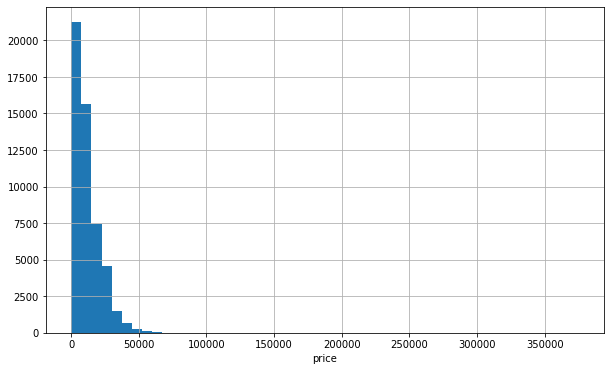

In [59]:
# Melihat histogram dari kolom price

data['price'].hist(bins=50, figsize=(10,6))
plt.xlabel('price')

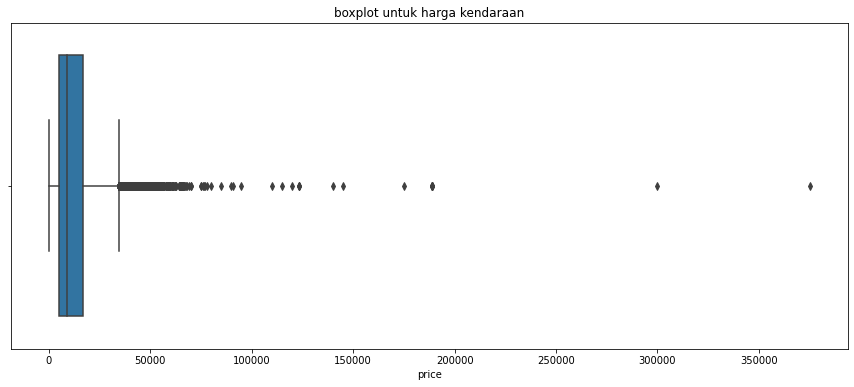

In [60]:
# Membuat boxplot untuk melihat outlier dari kolom price

plt.figure(figsize=(15, 6))
sns.boxplot(data=data, x='price')
plt.title('boxplot untuk harga kendaraan')
plt.show()

Dilihat dari histogram diatas dan diyakinkan lagi dengan boxplot, memang benar bahwa kolom price memiliki outlier sampai angka lebih dari 350000. Hal ini terjadi mungkin karena harga kendaraan yang bervariasi yang diiklankan di website, dimana user bebas memasang iklan dengan harga berapapun.

Text(0.5, 0, 'car_age')

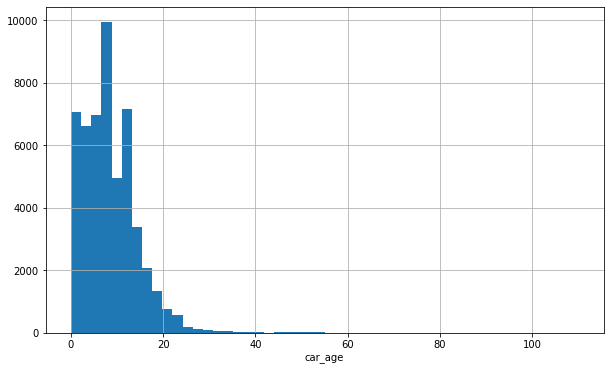

In [61]:
# Melihat histogram dari kolom usia kendaraan ketika iklan ditayangkan

data['car_age'].hist(bins=50, figsize=(10,6))
plt.xlabel('car_age')

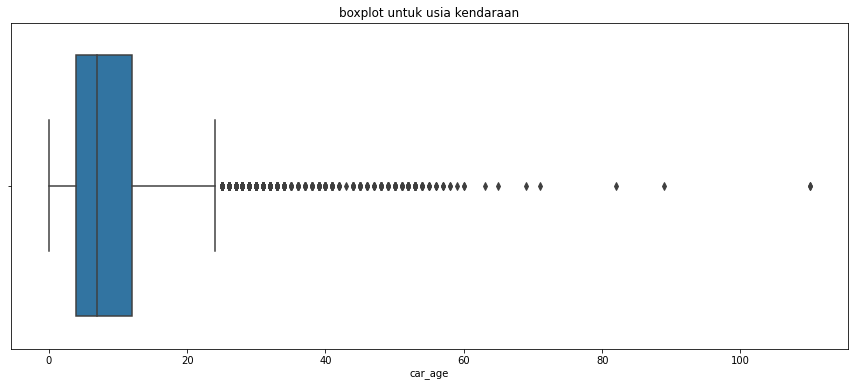

In [62]:
# Membuat boxplot untuk melihat outlier dari kolom usia kendaraan ketika iklan ditayangkan

plt.figure(figsize=(15, 6))
sns.boxplot(data=data, x='car_age')
plt.title('boxplot untuk usia kendaraan')
plt.show()

Selanjutnya, dari histogram diatas dan diyakinkan lagi dengan boxplot, kolom usia kendaraan juga terlihat memiliki outlier sampai angka lebih dari 100 tahun. Hal ini bisa saja terjadi karena jenis kendaraan yang diiklankan di website bervariasi, sehingga tidak menutup kemungkinan adanya kendaraan yang lebih dari 100 tahun, mungkin saja itu kendaraan legenda warisan dari kakek neneknya :)

Text(0.5, 0, 'odometer')

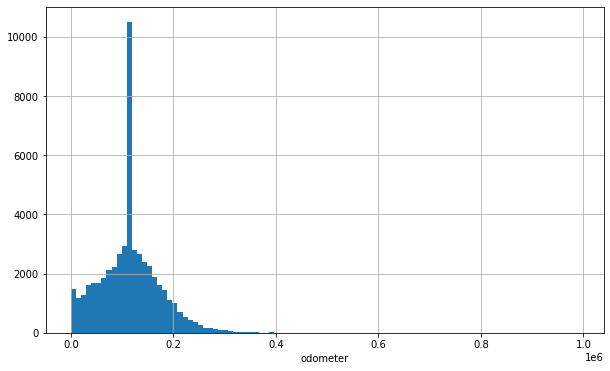

In [63]:
# Melihat histogram dari kolom jarak tempuh

data['odometer'].hist(bins=100, figsize=(10,6))
plt.xlabel('odometer')

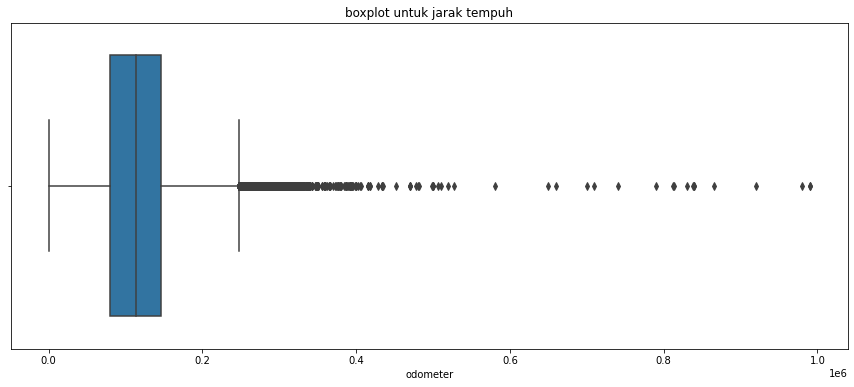

In [64]:
# Membuat boxplot untuk melihat outlier dari kolom jarak tempuh kendaraan

plt.figure(figsize=(15, 6))
sns.boxplot(data=data, x='odometer')
plt.title('boxplot untuk jarak tempuh')
plt.show()

Selanjutnya, sama halnya seperti 2 parameter sebelumnya, kolom odomoter juga terlihat memiliki outlier. Asumsi kita hal ini terjadi karena jenis kendaraan yang diiklankan di website bervariasi, dimana semakin lama umur kendaraan maka biasanya odometernya juga sudah tinggi.

Text(0.5, 0, 'cylinders')

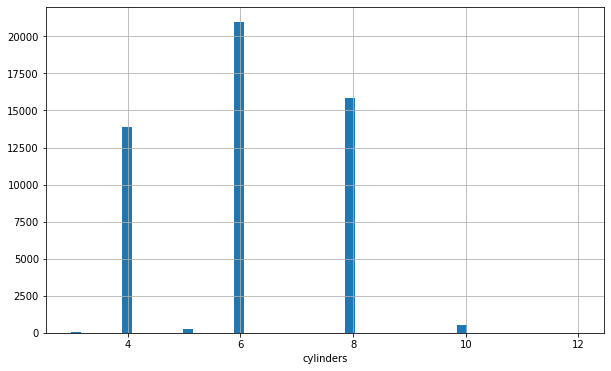

In [65]:
# Melihat histogram dari kolom jumlah silinder

data['cylinders'].hist(bins=50, figsize=(10,6))
plt.xlabel('cylinders')

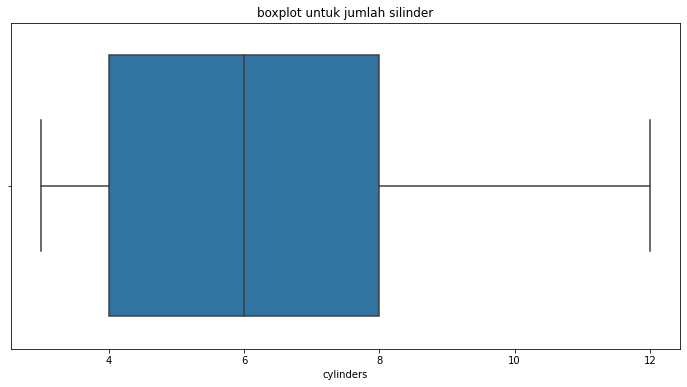

In [66]:
# Membuat boxplot untuk melihat outlier dari kolom jumlah silinder

plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='cylinders')
plt.title('boxplot untuk jumlah silinder')
plt.show()

Dari boxplot diatas, terlihat jelas bahwa kolom silinder tidak memiliki outlier. Hal ini karena kendaraan yang diiklankan informasinya sudah sesuai, yaitu kendaraan biasanya bermesin 3 sampai dengan 12 silinder (pencarian di Google mengatakan jumlah silinder kendaraan terbanyak adalah 16).

Text(0.5, 0, 'condition_scale')

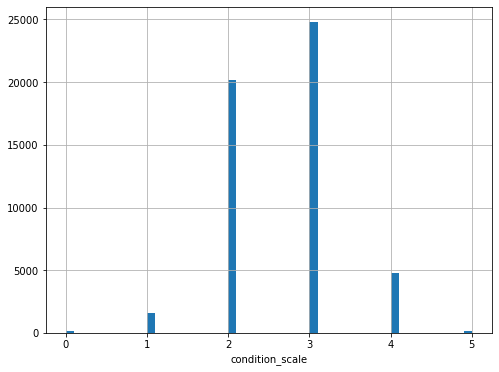

In [67]:
# Melihat histogram dari kondisi kendaraan dari skalanya

data['condition_scale'].hist(bins=50, figsize=(8, 6))
plt.xlabel('condition_scale')

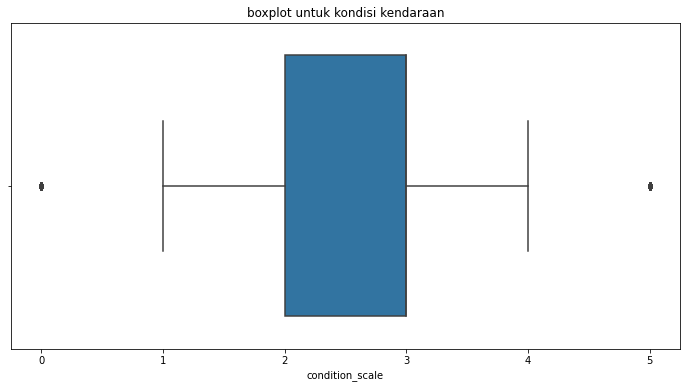

In [68]:
# Membuat boxplot untuk melihat outlier di kolom kondisi kendaraan dari skalanya

plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='condition_scale')
plt.title('boxplot untuk kondisi kendaraan')
plt.show()

Dari boxplot diatas, kolom kondisi kendaraan tidak memiliki outlier. Karena kita sudah tahu bahwa skala kondisi kendaraan adalah 1 sampai dengan 5 dengan masing-masing keterangan:
new = 5
like new = 4
excellent = 3
good = 2
fair = 1
salvage = 0

## Mempelajari dan Menangani Outlier

Dengan hasil di atas, ditemukan bahwa kolom price, car_age, dan odometer mengandung outlier. akan membuat beberapa DataFrame terpisah tanpa *outlier* tersebut. Sebelumnya, kita akan mengidentifikasinya dengan menentukan batas bawah/atas untuk rentang nilai normal.

In [69]:
# hitung Q1 dan Q3 kolom price
Q1 = data['price'].quantile(.25)
Q3 = data['price'].quantile(.75)

# hitung IQR
IQR = Q3-Q1

# hitung batas atas dan batas bawah untuk mendeteksi outlier
outlier_lower_bound_price = Q1 - 1.5*IQR
outlier_upper_bound_price = Q3 + 1.5*IQR

In [70]:
# menampilkan batas bawah dan batas atas kolom price

print('Batas bawah kolom price:', outlier_lower_bound_price)
print('Batas atas kolom price:', outlier_upper_bound_price)

Batas bawah kolom price: -12758.5
Batas atas kolom price: 34597.5


In [71]:
# hitung Q1 dan Q3 kolom car_age
Q1 = data['car_age'].quantile(.25)
Q3 = data['car_age'].quantile(.75)

# hitung IQR
IQR = Q3-Q1

# hitung batas atas dan batas bawah untuk mendeteksi outlier
outlier_lower_bound_car_age = Q1 - 1.5*IQR
outlier_upper_bound_car_age = Q3 + 1.5*IQR

In [72]:
# menampilkan batas bawah dan batas atas kolom price

print('Batas bawah kolom usia kendaraan:', outlier_lower_bound_car_age)
print('Batas atas kolom usia kendaraan:', outlier_upper_bound_car_age)

Batas bawah kolom usia kendaraan: -8.0
Batas atas kolom usia kendaraan: 24.0


In [73]:
# hitung Q1 dan Q3 kolom odometer
Q1 = data['odometer'].quantile(.25)
Q3 = data['odometer'].quantile(.75)

# hitung IQR
IQR = Q3-Q1

# hitung batas atas dan batas bawah untuk mendeteksi outlier
outlier_lower_bound_odometer = Q1 - 1.5*IQR
outlier_upper_bound_odometer = Q3 + 1.5*IQR

In [74]:
# menampilkan batas bawah dan batas atas kolom price

print('Batas bawah kolom odomter:', outlier_lower_bound_odometer)
print('Batas atas kolom odomter:', outlier_upper_bound_odometer)

Batas bawah kolom odomter: -21859.0
Batas atas kolom odomter: 247581.0


In [75]:
# membuat fungsi untuk mengeluarkan outlier

def remove_outlier(dataset, col):
    Q1 = dataset[col].quantile(.25)
    Q3 = dataset[col].quantile(.75)
    IQR = Q3-Q1
    data_non_outlier = dataset[~((dataset[col] < (Q1 - 1.5*IQR)) | (dataset[col] > (Q1 + 1.5*IQR)))]
    return data_non_outlier

In [76]:
# Simpan data tanpa outlier dalam DataFrame yang terpisah
# Kolom kondisi silinder & kendaraan tidak ada outlier sehingga tidak dibuatkan DataFrame tanpa outlier

filter_for_price = remove_outlier(dataset=data, col='price')
filter_for_car_age = remove_outlier(dataset=data, col='car_age')
filter_for_odometer = remove_outlier(dataset=data, col='odometer')


## Mempelajari Parameter Inti Tanpa Outlier

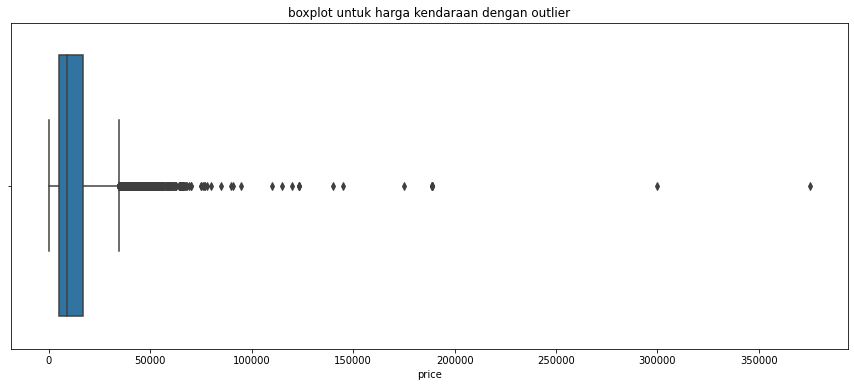

In [77]:
# Membuat boxplot untuk melihat kolom price dengan outlier

plt.figure(figsize=(15, 6))
sns.boxplot(data=data, x='price')
plt.title('boxplot untuk harga kendaraan dengan outlier')
plt.show()

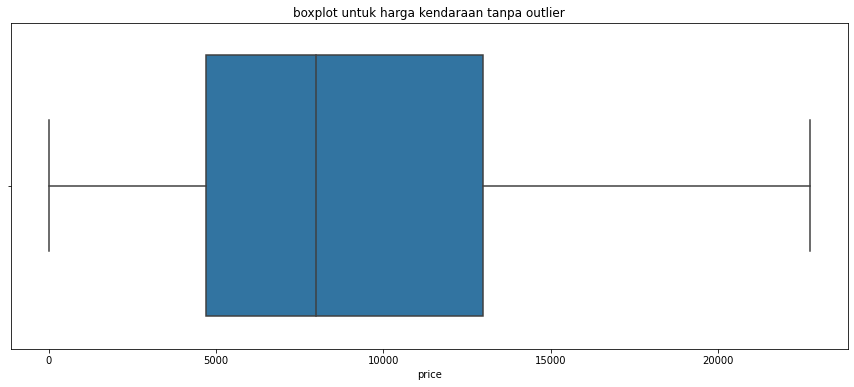

In [78]:
# Membuat boxplot untuk melihat kolom price tanpa data outlier

plt.figure(figsize=(15, 6))
sns.boxplot(data=filter_for_price, x='price')
plt.title('boxplot untuk harga kendaraan tanpa outlier')
plt.show()

Diatas ini adalah perbandingan boxplot paremeter inti dengan outlier dan tanpa outlier. 
Setelah dibersihkan outliernya, boxplot kedua untuk harga kendaraan berada dikisaran harga 0 sampai dengan 20000an dengan mediannya di angka +- 80000.

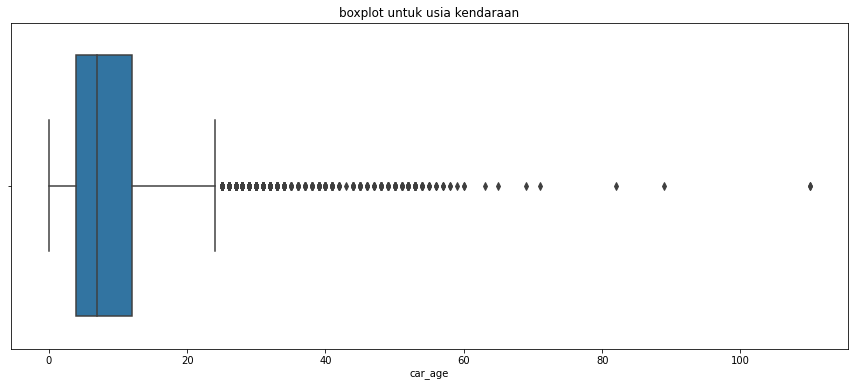

In [79]:
# Membuat boxplot untuk melihat outlier dari kolom usia kendaraan ketika iklan ditayangkan

plt.figure(figsize=(15, 6))
sns.boxplot(data=data, x='car_age')
plt.title('boxplot untuk usia kendaraan')
plt.show()

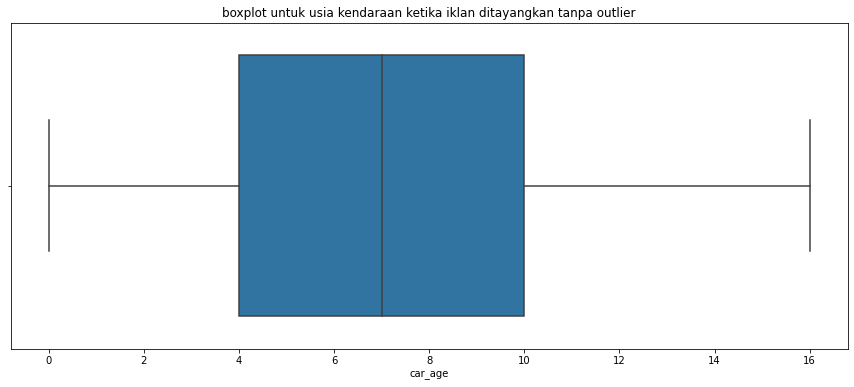

In [80]:
# Membuat boxplot untuk melihat kolom usia kendaraan ketika iklan ditayangkan tanpa data outlier

plt.figure(figsize=(15, 6))
sns.boxplot(data=filter_for_car_age, x='car_age')
plt.title('boxplot untuk usia kendaraan ketika iklan ditayangkan tanpa outlier')
plt.show()

Diatas ini adalah perbandingan boxplot paremeter inti dengan outlier dan tanpa outlier untuk usia kendaraan ketika iklan ditayangkan. 
Setelah dibersihkan outliernya, boxplot kedua berada dikisaran harga 0 sampai dengan 16 tahun dengan mediannya di angka +- 7 tahun.

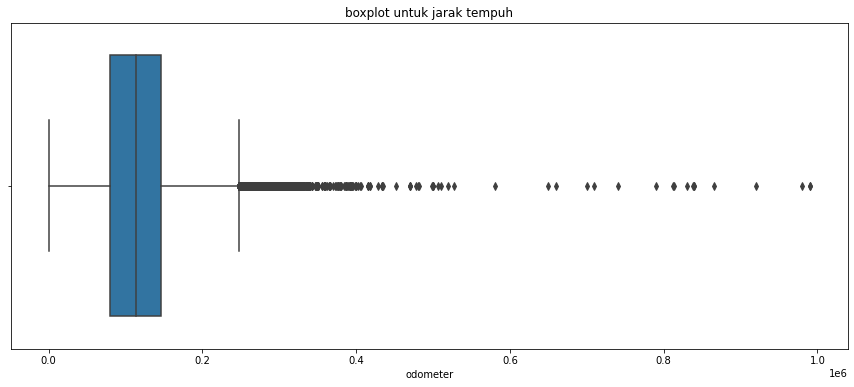

In [81]:
# Membuat boxplot untuk melihat outlier dari kolom jarak tempuh kendaraan

plt.figure(figsize=(15, 6))
sns.boxplot(data=data, x='odometer')
plt.title('boxplot untuk jarak tempuh')
plt.show()

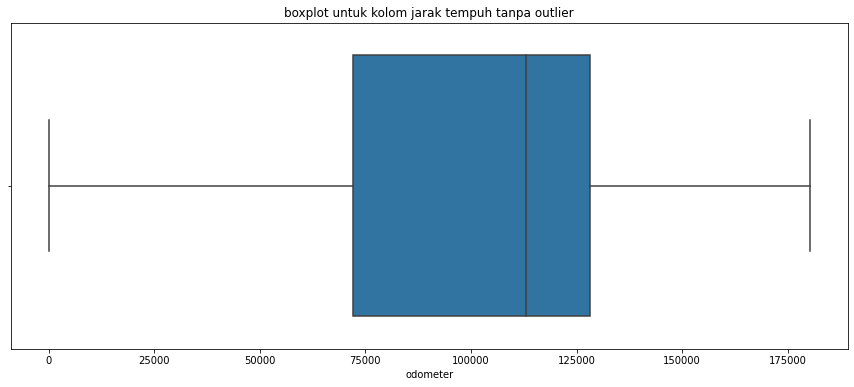

In [82]:
# Membuat boxplot untuk melihat kolom jarak tempuh tanpa outlier tanpa data outlier

plt.figure(figsize=(15, 6))
sns.boxplot(data=filter_for_odometer, x='odometer')
plt.title('boxplot untuk kolom jarak tempuh tanpa outlier')
plt.show()

Diatas ini adalah perbandingan boxplot paremeter inti dengan outlier dan tanpa outlier untuk jarak tempuh kendaraan.
Setelah dibersihkan outliernya, boxplot kedua berada dikisaran 0 sampai dengan +- 175000 dengan mediannya di angka +- 110000.

## Masa Berlaku Iklan
Dari data dibawah ini terlihat bahwa:
1. Rata-rata iklan ditayangkan adalah 39 hari dan mediannya 33 hari.
2. Umumnya, sebuah iklah ditayangkan selama 28 hari, terlihat dari juga histogram diatas dan nilai penyebaran / standar deviasi.
3. Selanjutnya, waktu tercepat iklan dihapus adalah 19 hari, sementara terlamanya sampai 271 hari 

In [83]:
# Mengembalikan days_listed ke integer agar bisa dilihat dengan histogram

data['days_listed'] = data['days_listed'].dt.days.astype(int)

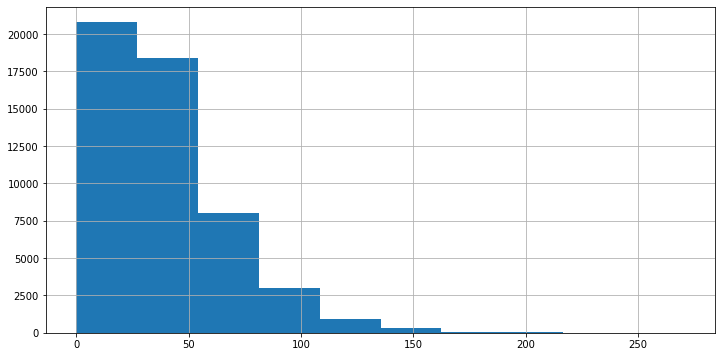

In [84]:
# Membuat histogram untuk kolom days_listed

data['days_listed'].hist(bins=10, figsize=(12,6))

In [85]:
# Melihat distribusi pada kolom days_listed

data['days_listed'].describe()

count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64

## Harga Rata-Rata Setiap Jenis Kendaraan

Berdasarkan hasil analisis dibawah ini, kendaraan dengan jenis SUV dan truck menduduki peringkat dua besar sebagai iklan yang paling banyak dipasang di web. Namun hal itu tidak selalu berpengaruh terhadap rata-rata harga kendaraan. Kita bisa melihatnya dimana harga rata-rata SUV tidak masuk dalam lima besar tertinggi (hanya sekitar 11000), sementara truck masih menduduki peringkat kedua dengan nilai rata-rata harga di sekitar 16000.

Text(0, 0.5, 'average price per type')

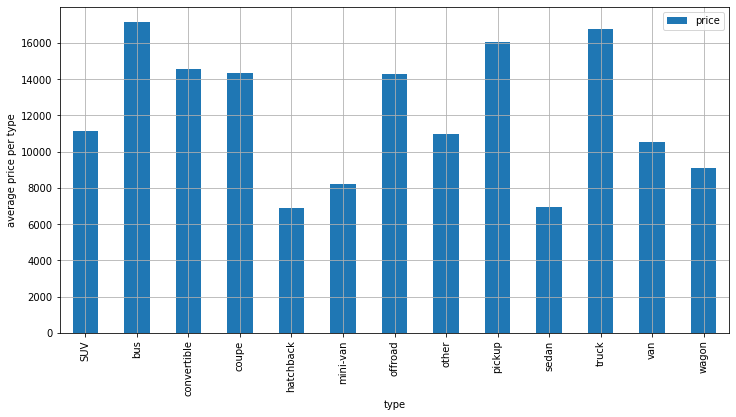

In [86]:
# Membuat histogram jumlah iklan dengan harga rata-rata per jenis kendaraan

avg_price_per_type = data.pivot_table(index='type', values='price')
avg_price_per_type.plot(kind='bar', grid=True, figsize=(12,6))
plt.ylabel('average price per type')

In [87]:
# Melihat distribusi iklan berdasarkan kolom jenis kendaraan

data['type'].value_counts()

SUV            12405
truck          12353
sedan          12154
pickup          6988
coupe           2303
wagon           1541
mini-van        1161
hatchback       1047
van              633
convertible      446
other            256
offroad          214
bus               24
Name: type, dtype: int64

## Faktor Harga

Berdasarkan analisis dibawah ini terkait hubungan harga kendaraan dengan usia kendaraan, jarak tempuh, kondisi, tipe transmisi, dan warnanya, adalah sebagai berikut:
1. Usia kendaraan berpengaruh positif medium terhadap harga kendaraan (corr = 0.50)
2. Jarak tempuh kendaraan berpengaruh negatif medium terhadap harga kendaraan (corr = -0.48)
3. Sementara, kondisi kendaraan berpengaruh negatif medium terhadap harga (corr = -0.41)
4. Selanjutnya, jenis transmisi automatic menjadi jenis kendaraan yang paling mahal harganya (melihat dari banyaknya outlier). Maka, kita asumsikan bahwa jika memilih kendaraan automatic akan semakin mahal harganya dibandingkan jenis transmisi lainnya. 
5. Terakhir, berdasarkan warna, kendaraan dengan warna kuning memiliki batas atas (Q3) harga tertinggi diantara warna lainnya, namun warna putih, hitam, dan silver memiliki data outlier terbanyak. Ini mungkin berhubungan dengan kendaraan yang paling banyak diiklankan adalah ketiga warna tersebut. Jadi, mungkin saja warna kuning menjadi lebih mahal harganya karena dibuat spesifik untuk orang-orang yang menyukainya.

In [88]:
# Menghitung korelasi antara harga dengan variabel numerik (usia, jarak tempuh, kondisi)

numeric_variable = data.pivot_table(
    index='type', values=['price', 'car_age', 'avg_mileage', 'condition_scale']
)
numeric_corr = numeric_variable.corr()
numeric_corr

,avg_mileage,car_age,condition_scale,price
avg_mileage,1.000000,-0.872705,0.218219,-0.485121
car_age,-0.872705,1.000000,0.103774,0.501799
condition_scale,0.218219,0.103774,1.000000,-0.417862
price,-0.485121,0.501799,-0.417862,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0202a43c40>,
      dtype=object)

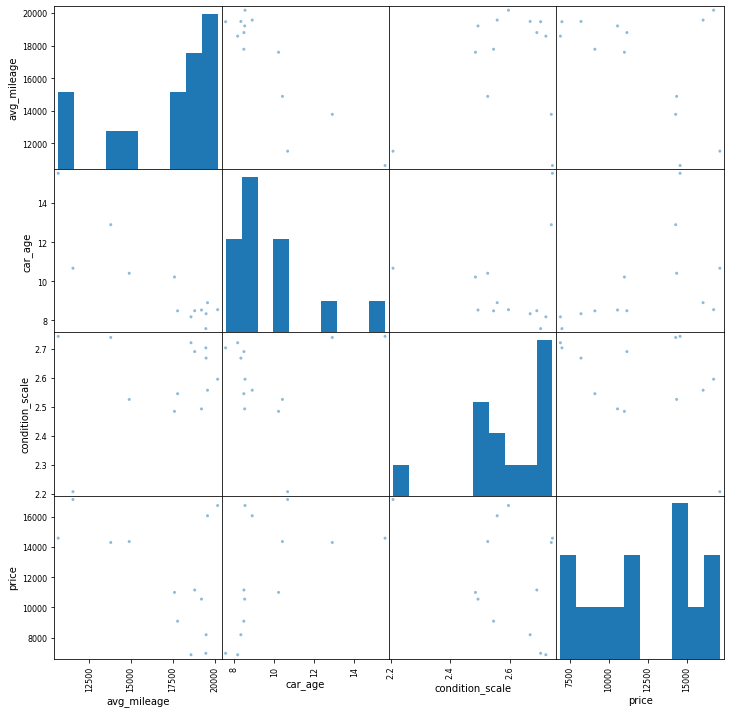

In [89]:
# Membuat matrix scatter plot untuk melihat korelasi antara harga dengan variabel kategorik - jenis transmisi

pd.plotting.scatter_matrix(numeric_variable, figsize=(12, 12))


In [90]:
# Melihat distribusi iklan berdasarkan jenis transmisi - untuk memastikan kategorinya memiliki setidaknya 50 iklan

data['transmission'].value_counts()

automatic    46902
manual        2829
other         1794
Name: transmission, dtype: int64

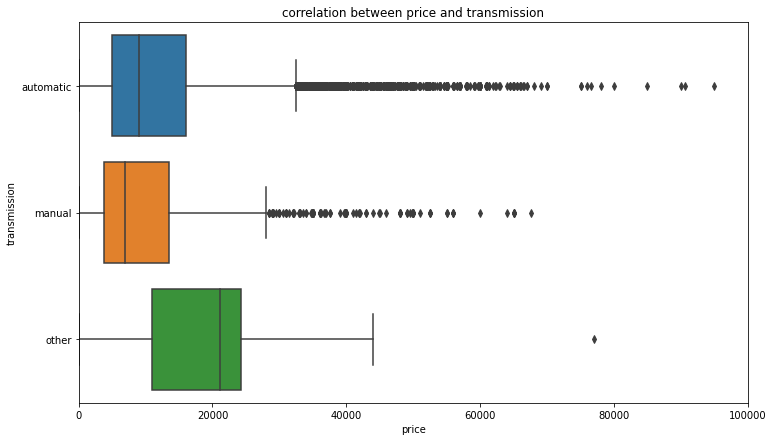

In [91]:
# Membuat boxplot untuk melihat korelasi antara harga dengan variabel kategorik - jenis transmisi

plt.figure(figsize=(12, 7))
sns.boxplot(data=data, x='price', y='transmission')
plt.title('correlation between price and transmission')
plt.xlim(-0, 100000)
plt.show()


In [92]:
# Melihat distribusi iklan berdasarkan warna - untuk memastikan kategorinya memiliki setidaknya 50 iklan

data['paint_color'].value_counts()

white     10029
others     9267
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

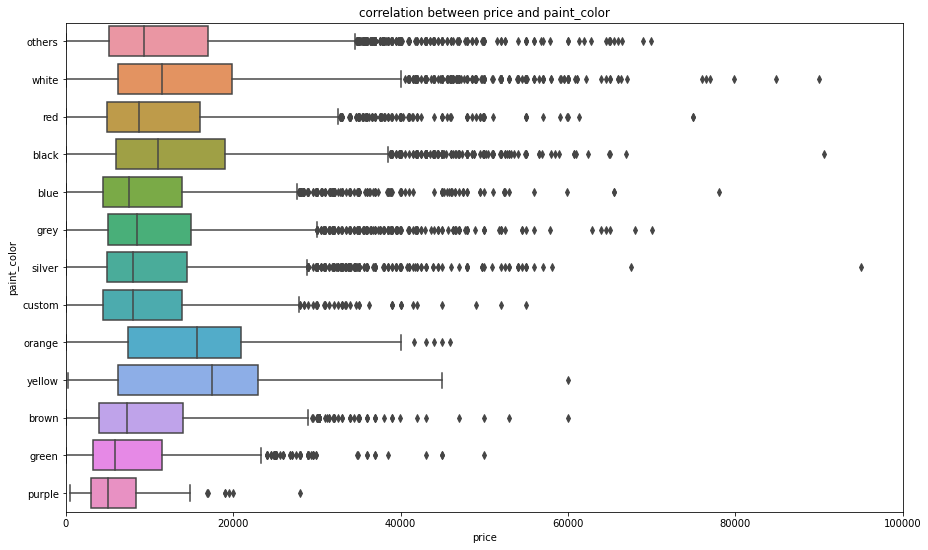

In [93]:
# Membuat boxplot untuk melihat korelasi antara harga dengan variabel kategorik - warna

plt.figure(figsize=(15, 9))
sns.boxplot(data=data, x='price', y='paint_color')
plt.title('correlation between price and paint_color')
plt.xlim(-0, 100000)
plt.show()


## Kesimpulan Umum

1. Data terlihat normal meskipun memiliki data mean, median, dan max yang variannya berjauhan, sehingga kita bisa memperkirakan bahwa terdapat banyak outlier. Namun, mengingat ini adalah situs web yang dapat diakses umum oleh siapapun, sehingga dirasa hal ini wajar. 
2. Untuk menangani data yang bermasalah, dilakukan hal-hal sebagai berikut:
    - Kolom is_4wd bertipe Boolean sehingga untuk nilai yang hilang diganti dengan False (asumsi kita, nilai yang hilang adalah kendaraan tanpa penggerak 4 roda.
    - Mengecek nilai yang hilang pada kolom model_year, cylinders dan odometer diganti dengan nilai median karena nilai mean dan median yang berjauhan, sehingga lebih baik mengambil nilai median. Sementara, paint_color diganti dengan kategori others.
    - Tipe kolom days_posted diganti menjadi tipe datetime.
3. Tidak ada data duplikat.
4. Menambahkan kolom baru skala numerik untuk memudahkan analisis.
5. Komparasi antara data asli dengan data tanpa outlier atas parameter intinya (price, car_age, odometer) memiliki perbedaan yang signifikan.
6. Terakhir, analisis faktor yang mempengaruhi harga, ditemukan bahwa:
    - Usia kendaraan berpengaruh positif medium terhadap harga kendaraan
    - Jarak tempuh & kondisi kendaraan berpengaruh negatif medium terhadap harga kendaraan
    - Selanjutnya, jenis transmisi automatic menjadi jenis kendaraan yang paling mahal harganya (melihat dari banyaknya outlier). Maka, kita asumsikan bahwa jika memilih kendaraan automatic akan semakin mahal harganya dibandingkan jenis transmisi lainnya.
    - Terakhir, berdasarkan warna, kendaraan dengan warna kuning memiliki batas atas (Q3) harga tertinggi diantara warna lainnya, namun warna putih, hitam, dan silver memiliki data outlier terbanyak. Ini mungkin berhubungan dengan kendaraan yang paling banyak diiklankan adalah ketiga warna tersebut. Jadi, mungkin saja warna kuning menjadi lebih mahal harganya karena dibuat spesifik untuk orang-orang yang menyukainya.